# SALARY

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [109]:
data = pd.read_csv('salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [110]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [111]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [113]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


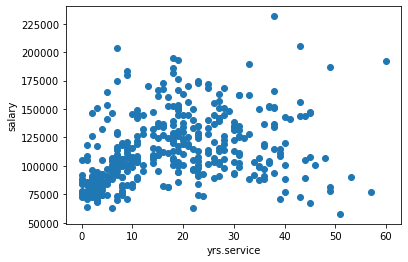

In [114]:
plt.scatter(data['yrs.service'],data['salary'])
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.show()

<AxesSubplot:>

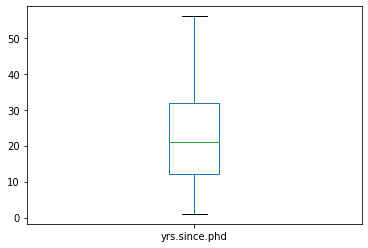

In [115]:
data['yrs.since.phd'].plot.box()

<AxesSubplot:>

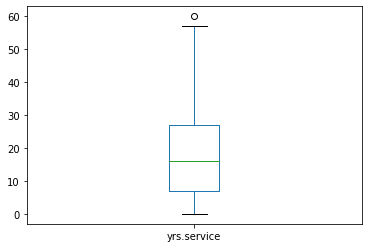

In [116]:
data['yrs.service'].plot.box()

<AxesSubplot:>

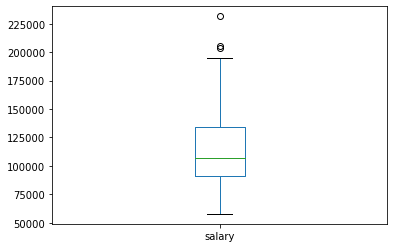

In [117]:
data['salary'].plot.box()

yrs.since.phd       AxesSubplot(0.125,0.536818;0.352273x0.343182)
yrs.service      AxesSubplot(0.547727,0.536818;0.352273x0.343182)
salary                 AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

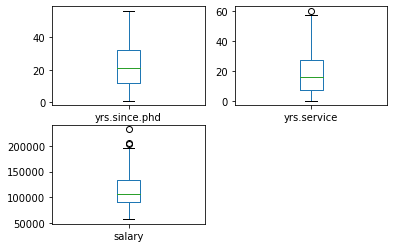

In [118]:
data.plot(kind='box',subplots=True,layout=(2,2))

In [119]:
x=data.iloc[:,2:4]
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [120]:
y=data.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [121]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=.20,random_state=45)


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((317, 2), (317,), (80, 2), (80,))

In [123]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("predict salary",pred)
print('Actual salary',y_test)

predict salary [106149.14808739 116385.69721975  95943.8429398   98089.94011685
 123510.96278238  99656.9254583  125989.20341859  89505.55140863
 101749.09153743 124197.93681383 107307.37175861 129648.35483917
 120237.88591887 112834.40799501 124283.11189653  96576.88587333
 136634.51422118  98776.91414831 142717.97518005  92284.69151922
 104829.1311224  120237.88591887 127695.29494065 108820.42600214
 110827.41699858 104335.19436948  92091.65424068  93164.70282921
 134102.34248704 108874.35710006 105794.31751509 110827.41699858
 130829.26562354 113552.62601124 118971.80005181 119743.94916596
 136279.68364888 109453.46893567 105161.27458156 147643.21246769
 116246.59103914 123510.96278238 106975.22829946 106728.259923
 131022.30290208 112394.40234002 110966.52317919 136194.50856618
 137792.7378924  112479.57742272 111846.53448918  97649.93446186
 128791.03064232 100923.01132536 116493.5594156   91018.60565215
  99796.03163891 107361.30285653 106867.36610362  94430.78869627
 126236.1717

In [124]:
print('error')

print('mean absolute error :-', mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))

error
mean absolute error :- 20667.948848455482
mean squared error :- 767264567.1857628
